# S&P 500 Market Analysis

### Purpose: Exploratory Market Analysis to identify changes in main driving factors for S&P 500 

    HOW VARIOUS FACTORS INFLUENCE MARKET PRICE FLUCTUATIONS 

### **The key factor analyzed in this exercise are:** 

- Sector	
- Price/Earnings	
- Dividend Yield	
- Earnings/Share	
- 52 Week Low	
- 52 Week High	
- Market Cap	
- EBITDA	
- Price/Sales	
- Price/Book

In [1]:
#Import python libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#Load the Data 

df = pd.read_csv('financials.csv',index_col=0)
df.head()

,Name,Sector,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book,SEC Filings
Symbol,,,,,,,,,,,,,
MMM,3M Company,Industrials,222.89,24.31,2.332862,7.92,259.77,175.490,1.387211e+11,9.048000e+09,4.390271,11.34,http://www.sec.gov/cgi-bin/browse-edgar?action...
AOS,A.O. Smith Corp,Industrials,60.24,27.76,1.147959,1.70,68.39,48.925,1.078342e+10,6.010000e+08,3.575483,6.35,http://www.sec.gov/cgi-bin/browse-edgar?action...
ABT,Abbott Laboratories,Health Care,56.27,22.51,1.908982,0.26,64.60,42.280,1.021210e+11,5.744000e+09,3.740480,3.19,http://www.sec.gov/cgi-bin/browse-edgar?action...
ABBV,AbbVie Inc.,Health Care,108.48,19.41,2.499560,3.29,125.86,60.050,1.813863e+11,1.031000e+10,6.291571,26.14,http://www.sec.gov/cgi-bin/browse-edgar?action...
ACN,Accenture plc,Information Technology,150.51,25.47,1.714470,5.44,162.60,114.820,9.876586e+10,5.643228e+09,2.604117,10.62,http://www.sec.gov/cgi-bin/browse-edgar?action...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 505 entries, MMM to ZTS
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            505 non-null    object 
 1   Sector          505 non-null    object 
 2   Price           505 non-null    float64
 3   Price/Earnings  503 non-null    float64
 4   Dividend Yield  505 non-null    float64
 5   Earnings/Share  505 non-null    float64
 6   52 Week Low     505 non-null    float64
 7   52 Week High    505 non-null    float64
 8   Market Cap      505 non-null    float64
 9   EBITDA          505 non-null    float64
 10  Price/Sales     505 non-null    float64
 11  Price/Book      497 non-null    float64
 12  SEC Filings     505 non-null    object 
dtypes: float64(10), object(3)
memory usage: 55.2+ KB


In [4]:
#Check for missing values

missing = df.isna().sum()
missing


Name              0
Sector            0
Price             0
Price/Earnings    2
Dividend Yield    0
Earnings/Share    0
52 Week Low       0
52 Week High      0
Market Cap        0
EBITDA            0
Price/Sales       0
Price/Book        8
SEC Filings       0
dtype: int64

In [5]:
#Drop na 
df.dropna(inplace=True)

In [6]:
df.describe()

,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book
count,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,4.950000e+02,4.950000e+02,495.000000,495.000000
mean,104.106505,24.654303,1.901477,3.815192,122.985808,83.812053,4.937665e+10,3.576406e+09,3.953316,14.498687
std,135.372594,40.767081,1.541039,5.529133,156.480433,106.497350,9.069162e+10,6.880742e+09,3.485055,89.838923
min,2.820000,-251.530000,0.000000,-24.620000,6.590000,2.800000,2.626102e+09,-5.067000e+09,0.153186,0.510000
25%,46.355000,15.350000,0.795585,1.525000,56.350000,38.520000,1.274957e+10,7.708980e+08,1.631733,2.020000
50%,73.920000,19.450000,1.790190,2.890000,86.680000,62.850000,2.143378e+10,1.613000e+09,2.880285,3.400000
75%,116.735000,25.770000,2.797169,5.120000,140.315000,96.610000,4.499315e+10,3.657500e+09,4.728857,6.130000
max,1806.060000,520.150000,12.661196,44.090000,2067.990000,1589.000000,8.095080e+11,7.938600e+10,20.094294,1403.380000


Text(0.5, 1.0, 'S&P 500  by Sector')

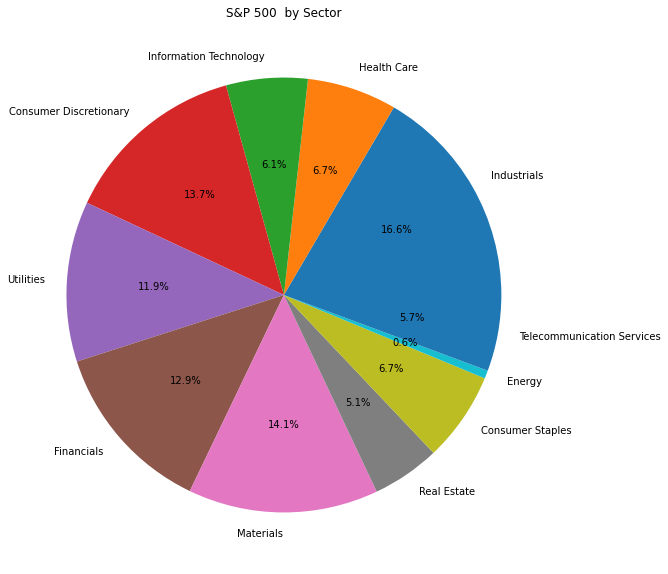

In [7]:
#Identify dominant sector represented as S&P 500 

sectors = np.array(df['Sector'].unique())

sectorcount = (df.groupby(["Sector"]).size().reset_index(name = "number of companies"))

SP_Pie = np.array(sectorcount["number of companies"])

fig =plt.figure(figsize=(24,10))

plt.pie(SP_Pie, labels = sectors, autopct='%1.1f%%')

plt.title("S&P 500  by Sector")


**It could be said that Industrials, Materials, Consumer Discretionary, and Financial sectors are among the most heavily represented areas of S&P 500**

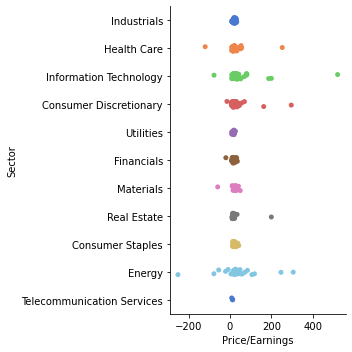

In [8]:
#Compare PE ratings spread by Industry

fig = sns.catplot(x = "Price/Earnings", y = "Sector", data = df, palette="muted")

plt.tight_layout()

plt.show(fig)

**This graph illustrates that Energy Sector has higest price spread.** 

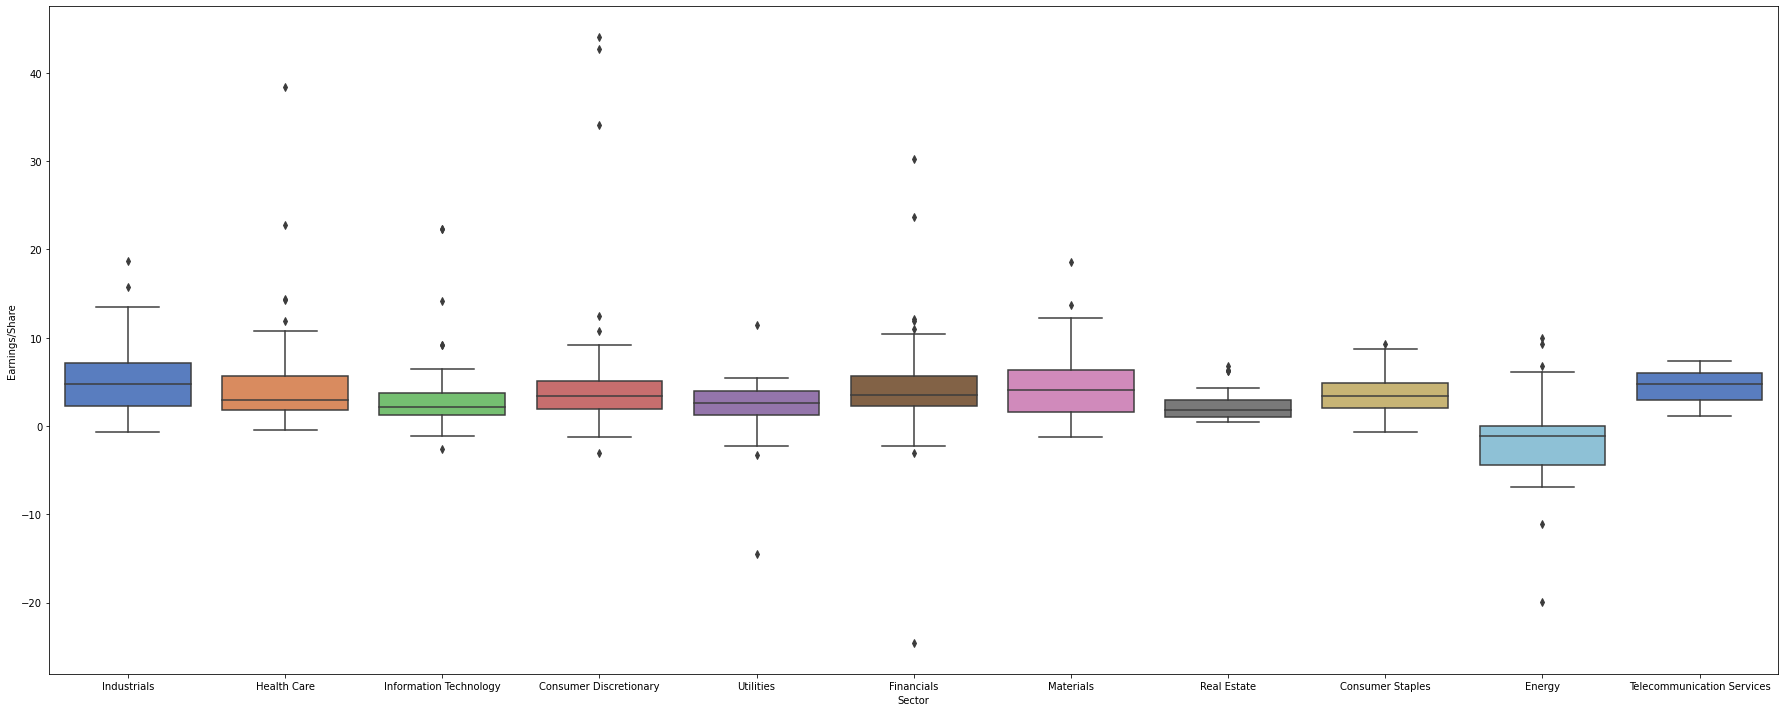

In [9]:
#Compare Price spread by Industry

fig = plt.figure(figsize=(25,10))

fig = sns.boxplot(x = "Sector", y = "Earnings/Share", data = df, palette="muted")

plt.tight_layout()

plt.show(fig)

In [10]:
Industrials_mean = df['Earnings/Share'][df['Sector'] == 'Industrials'].mean()
print('Industrials Mean:', round(Industrials_mean, 2))

Healthcare_mean = df['Earnings/Share'][df['Sector'] == 'Health Care'].mean()
print('Health Care Mean:', round(Healthcare_mean,2))

IT_mean = df['Earnings/Share'][df['Sector'] == 'Information Technology'].mean()
print('Information Technology:', round(IT_mean, 2))

Consumers_mean = df['Earnings/Share'][df['Sector'] == 'Consumer Discretionary'].mean()
print('Consumers Industry Mean:', round(Consumers_mean, 2))

Utilities_mean = df['Earnings/Share'][df['Sector'] == 'Utilities'].mean()
print('Utilities Mean:', round(Utilities_mean, 2))

Finance_mean = df['Earnings/Share'][df['Sector'] == 'Financials'].mean()
print('Finance Industry Mean:', round(Finance_mean, 2))

Materials_mean = df['Earnings/Share'][df['Sector'] == 'Materials'].mean()
print('Materials Mean:', round(Materials_mean, 2))

RealEstate_mean = df['Earnings/Share'][df['Sector'] == 'Real Estate'].mean()
print('Real Estate Mean:', round(RealEstate_mean, 2))

ConsumerStaples_mean = df['Earnings/Share'][df['Sector'] == 'Consumer Staples'].mean()
print('Consumer Staples Mean:', round(ConsumerStaples_mean, 2))

Energy_mean = df['Earnings/Share'][df['Sector'] == 'Energy'].mean()
print('Energy Industry Mean:', round(Energy_mean, 2))


Telecommunication_mean = df['Earnings/Share'][df['Sector'] == 'Telecommunication Services'].mean()
print('Telecommunication Services Mean:', round(Telecommunication_mean, 2))



Industrials Mean: 5.26
Health Care Mean: 4.86
Information Technology: 3.11
Consumers Industry Mean: 4.91
Utilities Mean: 2.01
Finance Industry Mean: 4.44
Materials Mean: 4.93
Real Estate Mean: 2.39
Consumer Staples Mean: 3.64
Energy Industry Mean: -1.64
Telecommunication Services Mean: 4.43


**The graph shows some big earners in consumers, but overal industry mean is closer to overal industries average** 
**EPS distribution is much wider in Finance but the mean is in the higher range of 4.43 and data is positevely skewed**
**EPS of Energy sector's EPS is negatively skewed with EPS mean of -1.6**   

In [11]:
sectors

array(['Industrials', 'Health Care', 'Information Technology',
       'Consumer Discretionary', 'Utilities', 'Financials', 'Materials',
       'Real Estate', 'Consumer Staples', 'Energy',
       'Telecommunication Services'], dtype=object)

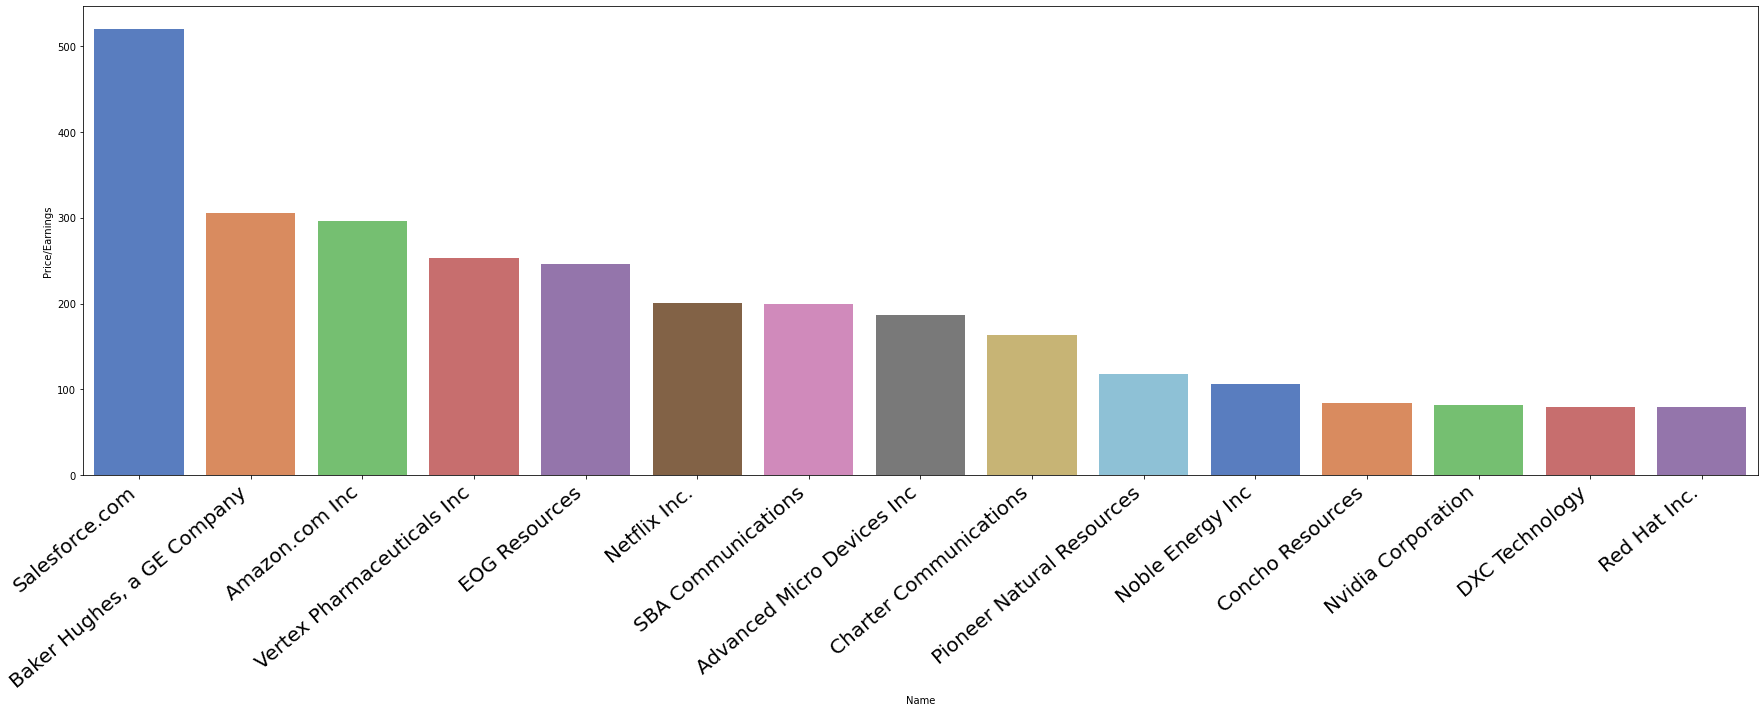

In [12]:
#Companies with higest return ratios (P/E)

ax = plt.figure(figsize=(25,10))

TOP15_PE = df.sort_values(by=['Price/Earnings'],ascending=False).head(15)

ax = sns.barplot(x = "Name", y = 'Price/Earnings' , data = TOP15_PE, palette = 'muted')

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right",fontsize=20)

plt.tight_layout()

plt.show()



**According to the data the biggest earners are Salesforce, GE, Amazon, Vertex, EOG and Neflix** 

<function matplotlib.pyplot.show(close=None, block=None)>

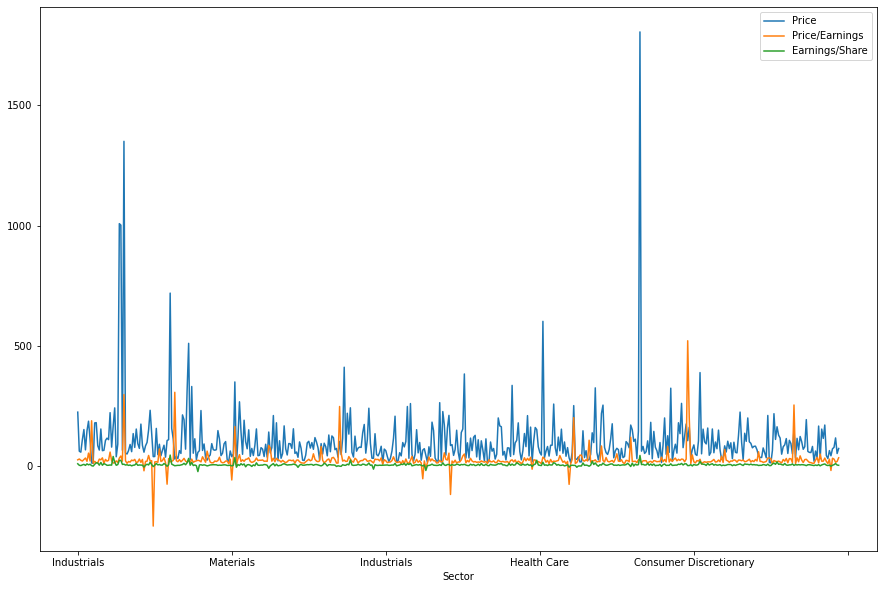

In [13]:
df.plot(x="Sector", y=['Price','Price/Earnings', "Earnings/Share"], kind="line", figsize=(15, 10))

plt.show

**This graph shows that in general PE, and EPS follow the same fluctuation pattern with the Price**

In [14]:
# Correct column names in df

df = df.rename(columns={"52 Week Low": "52 Week High", "52 Week High": "52 Week Low"})

df.head()


,Name,Sector,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week High,52 Week Low,Market Cap,EBITDA,Price/Sales,Price/Book,SEC Filings
Symbol,,,,,,,,,,,,,
MMM,3M Company,Industrials,222.89,24.31,2.332862,7.92,259.77,175.490,1.387211e+11,9.048000e+09,4.390271,11.34,http://www.sec.gov/cgi-bin/browse-edgar?action...
AOS,A.O. Smith Corp,Industrials,60.24,27.76,1.147959,1.70,68.39,48.925,1.078342e+10,6.010000e+08,3.575483,6.35,http://www.sec.gov/cgi-bin/browse-edgar?action...
ABT,Abbott Laboratories,Health Care,56.27,22.51,1.908982,0.26,64.60,42.280,1.021210e+11,5.744000e+09,3.740480,3.19,http://www.sec.gov/cgi-bin/browse-edgar?action...
ABBV,AbbVie Inc.,Health Care,108.48,19.41,2.499560,3.29,125.86,60.050,1.813863e+11,1.031000e+10,6.291571,26.14,http://www.sec.gov/cgi-bin/browse-edgar?action...
ACN,Accenture plc,Information Technology,150.51,25.47,1.714470,5.44,162.60,114.820,9.876586e+10,5.643228e+09,2.604117,10.62,http://www.sec.gov/cgi-bin/browse-edgar?action...


**Noted discrepancy in data set where the 52 Week Low and 52 Week High data incorrectly reflect values, suggesting that column names in the original dataset mismached column names with 52 Week Low actually showing the highest markers and 52 Week high showing the lowest pricing.**

Added new columns Price vs 52wHigh and Price vs 52 wLow, where 

**StockRank_High:** To screen for companies that are within 10% of their 52wk high, the criteria would be Price vs. 52 Week High is greater than -10 (i.e. greater / less negative than -10%). Here's a sample screen that you can fork.

*The formula is : Current Price - 52 week High / 52 Week High.*

**StockRank_Low:** To screen for companies that are within 10% of their 52 Week Low, the criteria would be Price vs. 52 Week Low is less than 10, rather than greater than 90 - it’s a comparison rather than a rank.





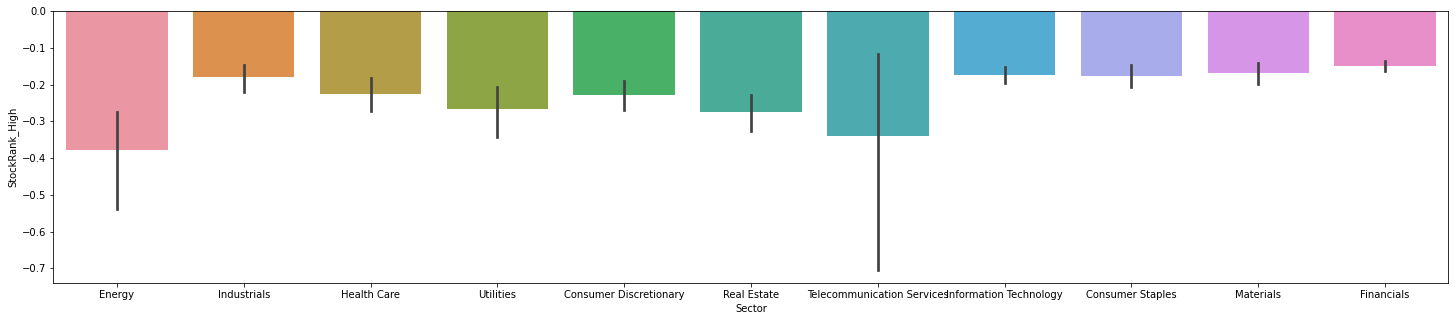

,Sector,Name,StockRank_High
Symbol,,,
RRC,Energy,Range Resources Corp.,-1.659126
CHK,Energy,Chesapeake Energy,-1.336879
GE,Industrials,General Electric,-1.116955
BHGE,Energy,"Baker Hughes, a GE Company",-1.099273
EVHC,Health Care,Envision Healthcare,-1.065648
SCG,Utilities,SCANA Corp,-1.002247
NWL,Consumer Discretionary,Newell Brands,-0.973486
CMG,Consumer Discretionary,Chipotle Mexican Grill,-0.875869
PCG,Utilities,PG&E Corp.,-0.871600


In [15]:
#Let's analyze the pricedrpos

df['StockRank_High'] = (df['Price'] - df['52 Week High'])/df['Price']

df['StockRank_Low'] = (df['Price'] - df['52 Week Low'])/df['Price']

Pricedrops = df.sort_values(by ='StockRank_High', ascending= True)

fig = plt.figure(figsize=(25,5))

_ = sns.barplot(x = 'Sector', y = 'StockRank_High' , data = Pricedrops)

plt.show(_)

Pricedrops[['Sector','Name','StockRank_High']].head(15)

**It looks like the biggest drop over 52 week period was in Energy(the biggest drop experiensed by GE companies), and Healthcare (Envision Healthcare dropped by -1.065)**

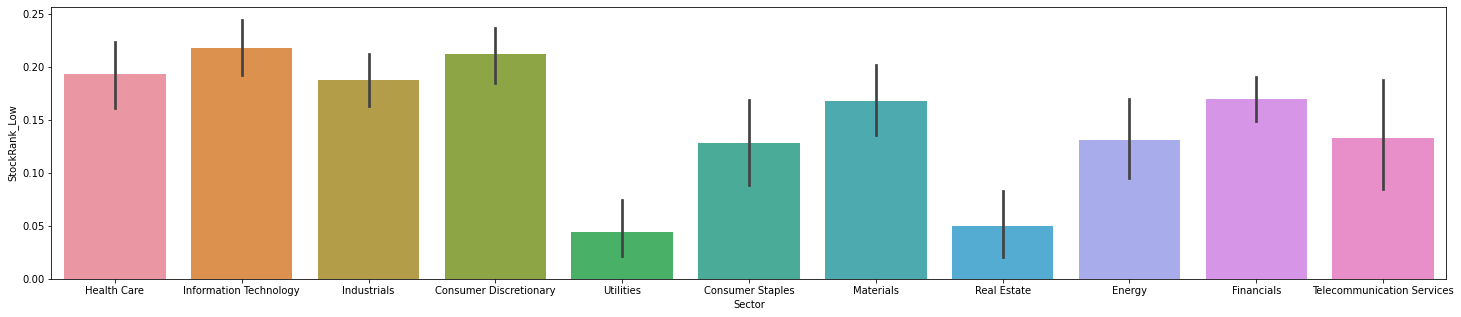

,Sector,Name,StockRank_Low
Symbol,,,
ALGN,Health Care,Align Technology,0.580400
NVDA,Information Technology,Nvidia Corporation,0.562477
BA,Industrials,Boeing Company,0.503458
KORS,Consumer Discretionary,Michael Kors Holdings,0.460603
WYNN,Consumer Discretionary,Wynn Resorts Ltd,0.452564
PYPL,Information Technology,PayPal,0.448009
NFLX,Information Technology,Netflix Inc.,0.447181
ABBV,Health Care,AbbVie Inc.,0.446442
VRTX,Health Care,Vertex Pharmaceuticals Inc,0.443338


In [16]:
#Let's visualize PriceIncreases

Priceincreases = df.sort_values(by='StockRank_Low', ascending=False)

fig = plt.figure(figsize=(25,5))

_ = sns.barplot(x = 'Sector', y = 'StockRank_Low' , data = Priceincreases)

plt.show(_)

top15increases = Priceincreases[['Sector','Name','StockRank_Low']].head(15)

top15increases

**It looks like the biggest price increase over 52 week period was in HealthCare (Align Technology 60% price increase, AbbVie, Vertex Pharma) followed by IT (Nvidia, PayPal, Netflix, Micron, and Amazon) and big industrials like Boeing and Grainger**

In [17]:
#Stock with highest growth

df['Growth'] = (df['52 Week High'] - df['52 Week Low'])

growth = df.sort_values(by = ['Growth'], ascending=False).head(15)

growth.head()

,Name,Sector,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week High,52 Week Low,Market Cap,EBITDA,Price/Sales,Price/Book,SEC Filings,StockRank_High,StockRank_Low,Growth
Symbol,,,,,,,,,,,,,,,,
AMZN,Amazon.com Inc,Consumer Discretionary,1350.50,296.16,0.0,6.16,1498.00,812.5000,6.858734e+11,1.613200e+10,3.927053,24.28,http://www.sec.gov/cgi-bin/browse-edgar?action...,-0.109219,0.398371,685.5000
PCLN,Priceline.com Inc,Consumer Discretionary,1806.06,24.26,0.0,42.66,2067.99,1589.0000,9.181745e+10,4.803487e+09,9.176564,6.92,http://www.sec.gov/cgi-bin/browse-edgar?action...,-0.145028,0.120184,478.9900
GOOG,Alphabet Inc Class C,Information Technology,1001.52,40.29,0.0,22.27,1186.89,803.1903,7.285356e+11,3.271400e+10,6.772653,4.67,http://www.sec.gov/cgi-bin/browse-edgar?action...,-0.185089,0.198029,383.6997
GOOGL,Alphabet Inc Class A,Information Technology,1007.71,31.48,0.0,22.27,1198.00,824.3000,7.338240e+11,3.421700e+10,6.801692,4.70,http://www.sec.gov/cgi-bin/browse-edgar?action...,-0.188834,0.182007,373.7000
AZO,AutoZone Inc,Consumer Discretionary,718.57,16.31,0.0,44.09,797.89,491.1300,1.992202e+10,2.347304e+09,1.851043,136.23,http://www.sec.gov/cgi-bin/browse-edgar?action...,-0.110386,0.316518,306.7600


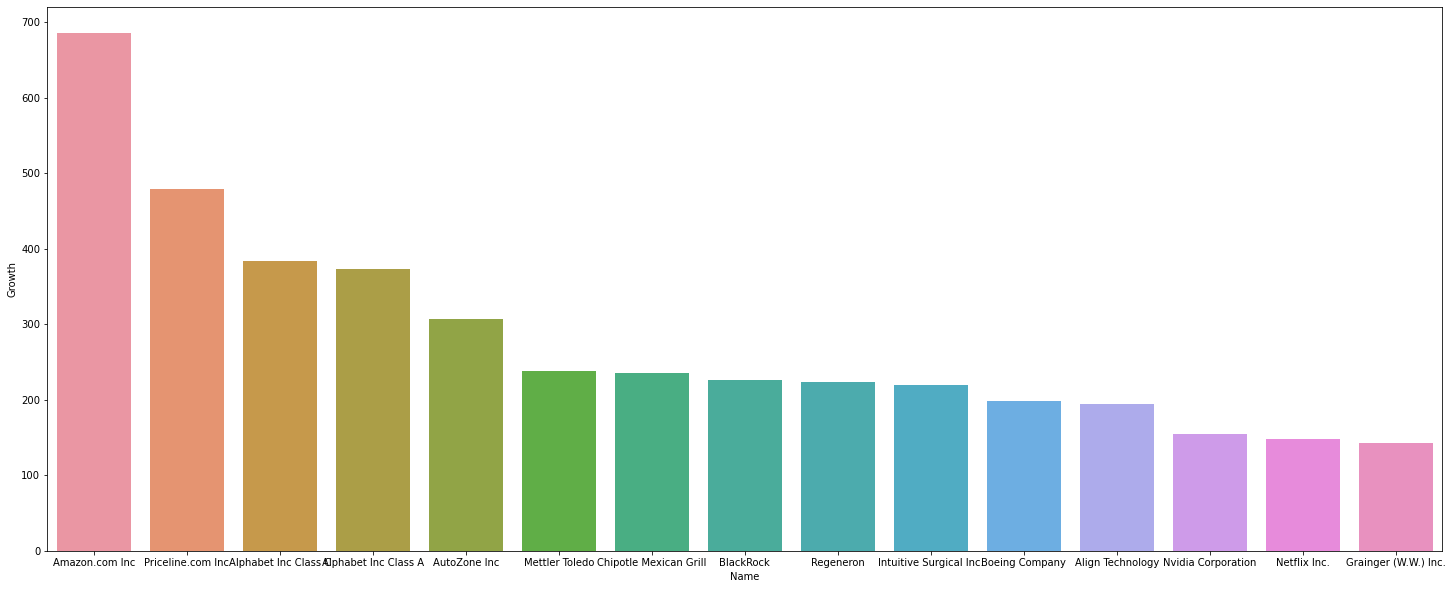

In [18]:
#Review 15 top companies with highest growth 

fig = plt.figure(figsize=(25,10))

growth_plot = sns.barplot( x = 'Name', y = 'Growth', data = growth)

**Among companies with biggest growth over the 52w period are Amazon, Priceline, Google, AutoZone, Mettler, Boeing, Netflix, and Chipotle**


In [19]:
#Find TOP PE value in each Sector
Industry_Leaders = df.groupby(["Sector"]).apply(lambda x: x.sort_values(by = "Price/Earnings", ascending = False).head(1))

Industry_Leaders

,,Name,Sector,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week High,52 Week Low,Market Cap,EBITDA,Price/Sales,Price/Book,SEC Filings,StockRank_High,StockRank_Low,Growth
Sector,Symbol,,,,,,,,,,,,,,,,
Consumer Discretionary,AMZN,Amazon.com Inc,Consumer Discretionary,1350.50,296.16,0.000000,6.16,1498.000,812.50,6.858734e+11,1.613200e+10,3.927053,24.28,http://www.sec.gov/cgi-bin/browse-edgar?action...,-0.109219,0.398371,685.500
Consumer Staples,MNST,Monster Beverage,Consumer Staples,61.99,42.17,0.000000,1.19,70.215,41.02,3.640383e+10,1.229478e+09,14.152587,9.56,http://www.sec.gov/cgi-bin/browse-edgar?action...,-0.132683,0.338280,29.195
Energy,BHGE,"Baker Hughes, a GE Company",Energy,27.50,305.56,2.499132,-0.31,57.730,28.03,3.299571e+10,2.850000e+08,1.939005,2.25,http://www.sec.gov/cgi-bin/browse-edgar?action...,-1.099273,-0.019273,29.700
Financials,CBOE,CBOE Holdings,Financials,111.15,35.06,0.942696,2.27,138.540,76.75,1.299830e+10,4.884060e+08,8.249042,5.15,http://www.sec.gov/cgi-bin/browse-edgar?action...,-0.246424,0.309492,61.790
Health Care,VRTX,Vertex Pharmaceuticals Inc,Health Care,151.60,252.67,0.000000,1.04,174.955,84.39,3.936939e+10,9.756200e+07,16.185404,21.91,http://www.sec.gov/cgi-bin/browse-edgar?action...,-0.154057,0.443338,90.565
Industrials,CTAS,Cintas Corporation,Industrials,149.32,32.75,1.034483,4.38,169.960,113.79,1.667615e+10,1.097295e+09,2.761406,6.53,http://www.sec.gov/cgi-bin/browse-edgar?action...,-0.138227,0.237945,56.170
Information Technology,CRM,Salesforce.com,Information Technology,104.03,520.15,0.000000,0.27,114.520,79.63,7.948912e+10,9.258040e+08,10.373879,8.81,http://www.sec.gov/cgi-bin/browse-edgar?action...,-0.100836,0.234548,34.890
Materials,DWDP,DowDuPont,Materials,68.21,49.43,2.152975,1.59,77.080,64.01,1.652033e+11,5.250000e+09,2.692239,1.54,http://www.sec.gov/cgi-bin/browse-edgar?action...,-0.130040,0.061575,13.070
Real Estate,SBAC,SBA Communications,Real Estate,159.85,199.81,0.000000,0.62,177.670,103.51,1.957203e+10,1.074240e+09,15.189207,91.04,http://www.sec.gov/cgi-bin/browse-edgar?action...,-0.111480,0.352455,74.160


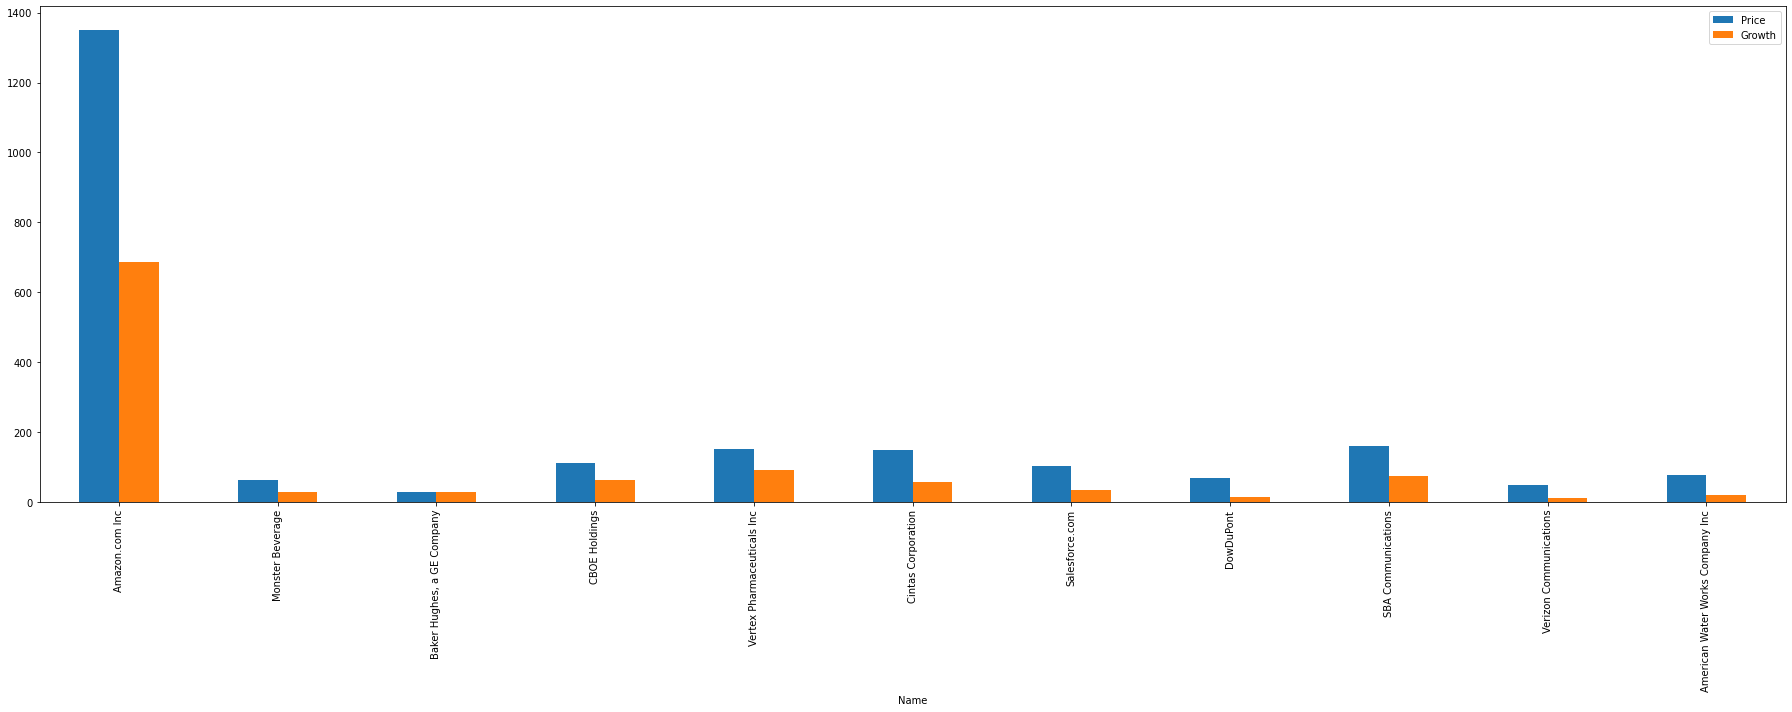

In [20]:
#Review Industry Leaders Price vs Growth

Industry_Leaders.plot(x="Name", y=['Price','Growth'], kind="bar", figsize=(25, 10))

plt.tight_layout()

plt.show()

**Amazon's stock almost doubled growing almost 50% of its MV, Vertex, Cintras, SBA and Salesforce has also shown significant growth rate**  

<Figure size 1440x360 with 0 Axes>

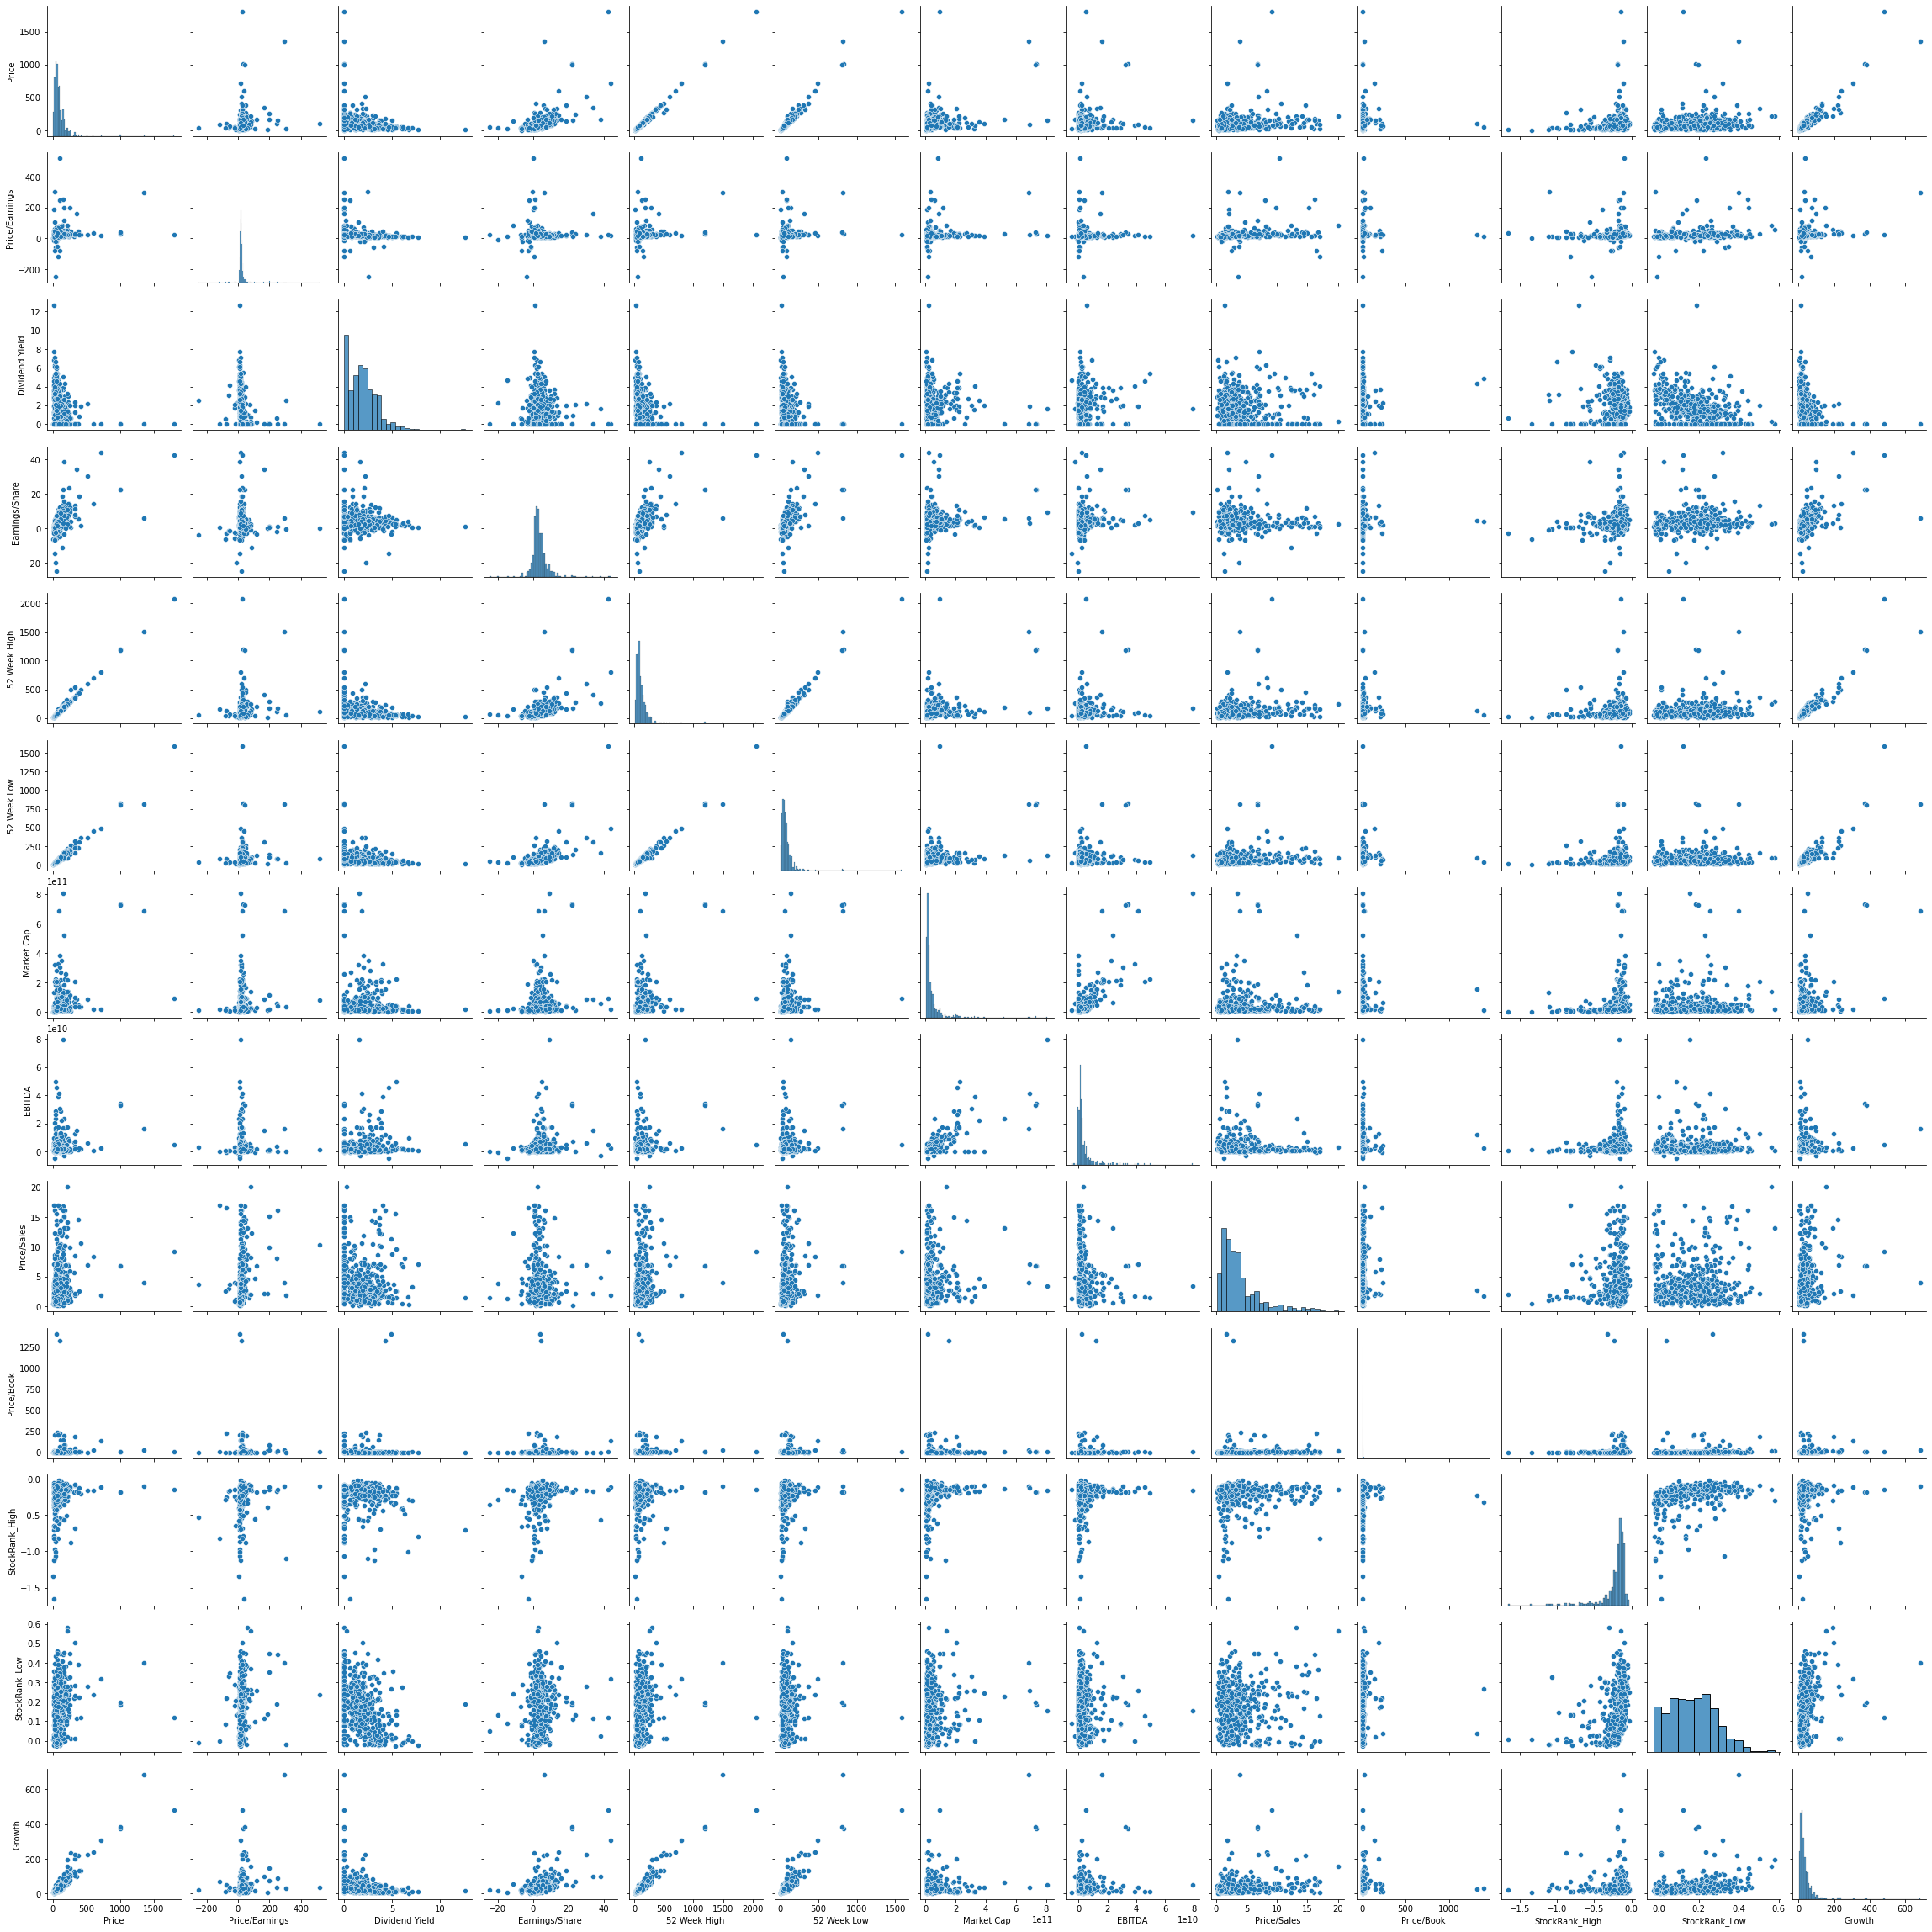

In [21]:
fig = plt.figure(figsize=(20,5))
sns.pairplot(df)

**This graph suggest dependancies between stock price and PE, EPS, Market Cap, and Growth**

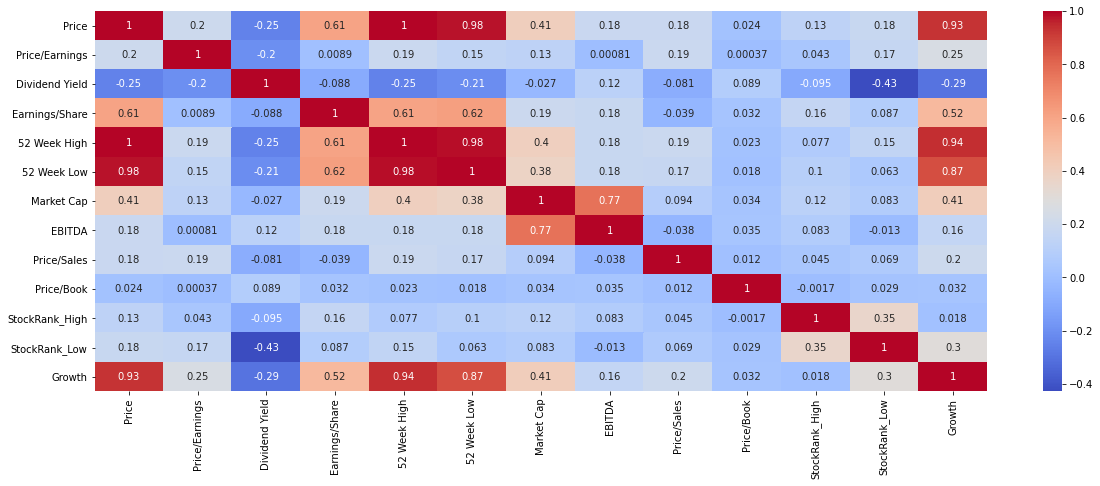

In [22]:
#Check corr between the categories

fig = plt.figure(figsize=(20,7))

heatmap = sns.heatmap(df.corr(),cmap='coolwarm',annot=True)


**The stogest correlation of 0.93 is between Price and Growth**
**EPS, Market Cap, and PE are among other factors affecting price** 


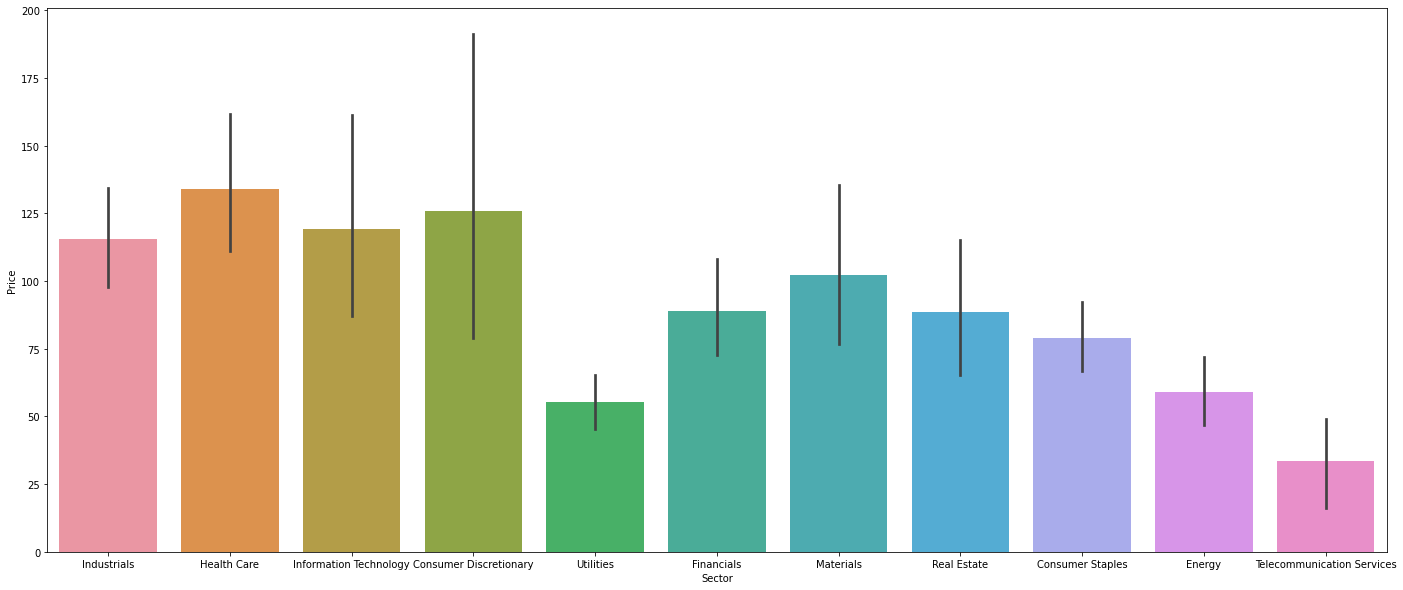

In [23]:
#Price distribtion over indistries

fig = plt.figure(figsize=(24,10))
industry_plot = sns.barplot( x = 'Sector', y = 'Price' , data = df)


**This graph suggests that the most expensive stock is held by Healthcare, Consumer Disretionary, IT, and Industrials**

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

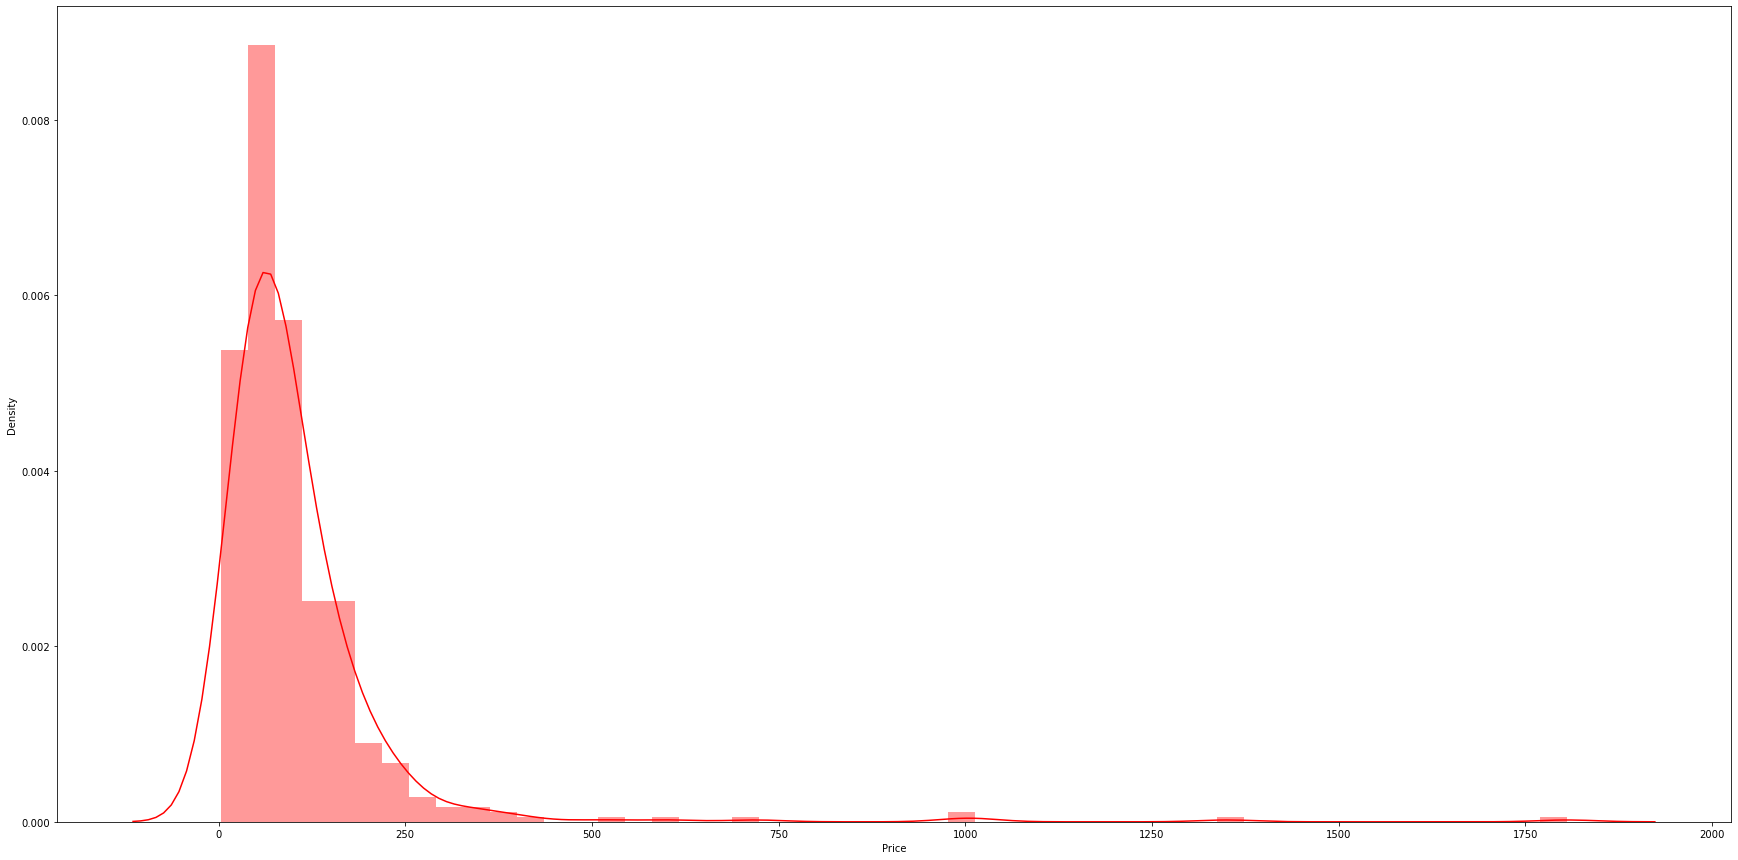

In [24]:
fig = plt.figure(figsize=(30,15))

sns.distplot(df['Price'],bins=50,color='red')

In [25]:
#Key statistics on Price

key_stats = df.Price.describe()
median = df.Price.median()
print('Key Stats:','\n',key_stats)


Key Stats: 
 count     495.000000
mean      104.106505
std       135.372594
min         2.820000
25%        46.355000
50%        73.920000
75%       116.735000
max      1806.060000
Name: Price, dtype: float64


**This graph shows Market Price ditribution suggeting that Price data is skewed to the right, with a long righ tail at 1,806 dollars in max value and 3 dollars per share the cheapest stock. A center at 74 dollars per share, and average of 104** 

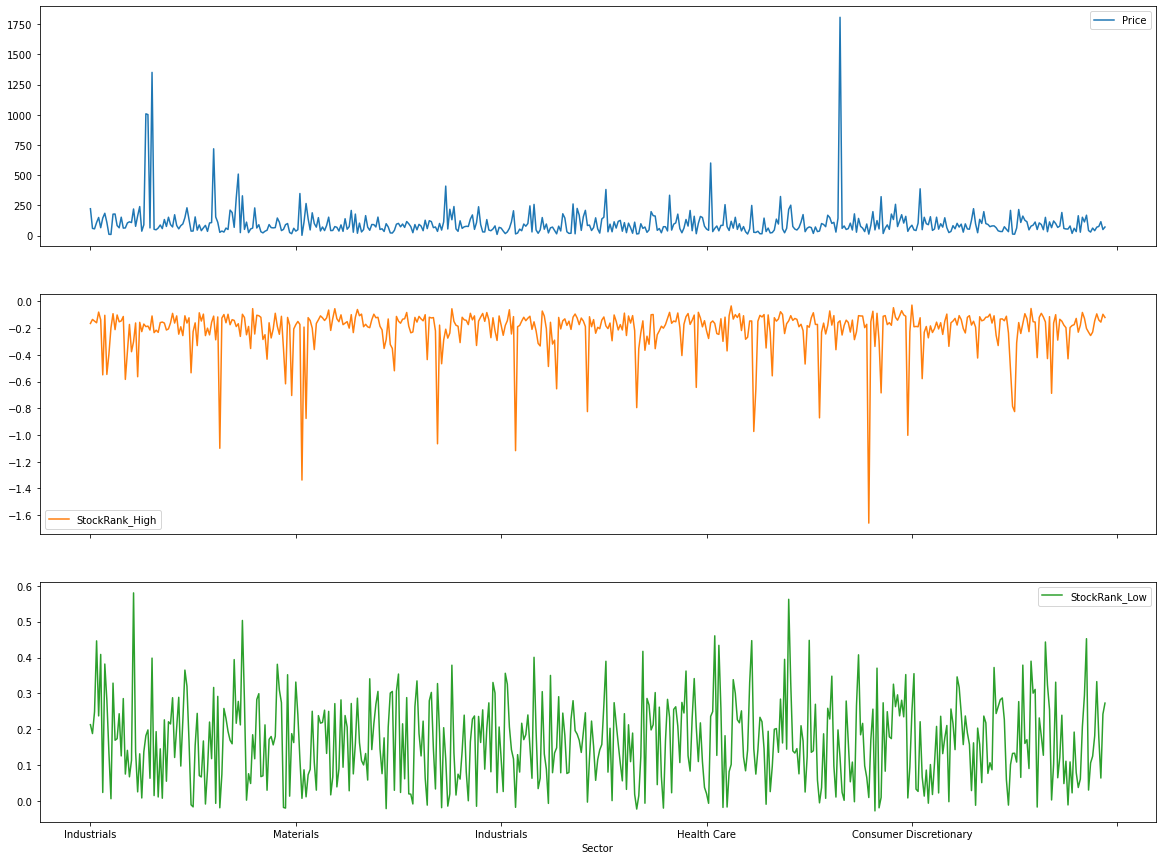

In [26]:
#See ditribution of price vs stock drops and increases
df.plot(subplots=True, x="Sector", y=['Price','StockRank_High','StockRank_Low' ],  figsize=(20, 15),)

plt.show()

In [27]:
#Stock with highest drops
drops = df.sort_values(by = ['StockRank_High'], ascending=True).head(15)

drops.head(10)


,Name,Sector,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week High,52 Week Low,Market Cap,EBITDA,Price/Sales,Price/Book,SEC Filings,StockRank_High,StockRank_Low,Growth
Symbol,,,,,,,,,,,,,,,,
RRC,Range Resources Corp.,Energy,12.82,35.61,0.609756,-2.79,34.09,12.70,3.255588e+09,8.200950e+08,1.962434,0.59,http://www.sec.gov/cgi-bin/browse-edgar?action...,-1.659126,0.009360,21.39
CHK,Chesapeake Energy,Energy,2.82,4.70,0.000000,-6.44,6.59,2.80,2.626102e+09,1.470000e+09,0.407652,1.84,http://www.sec.gov/cgi-bin/browse-edgar?action...,-1.336879,0.007092,3.79
GE,General Electric,Industrials,14.45,13.76,3.147541,-0.72,30.59,14.71,1.322493e+11,-2.060000e+08,1.088761,1.70,http://www.sec.gov/cgi-bin/browse-edgar?action...,-1.116955,-0.017993,15.88
BHGE,"Baker Hughes, a GE Company",Energy,27.50,305.56,2.499132,-0.31,57.73,28.03,3.299571e+10,2.850000e+08,1.939005,2.25,http://www.sec.gov/cgi-bin/browse-edgar?action...,-1.099273,-0.019273,29.70
EVHC,Envision Healthcare,Health Care,35.34,10.91,0.000000,-0.48,73.00,23.77,4.212729e+09,8.272000e+08,1.227099,0.64,http://www.sec.gov/cgi-bin/browse-edgar?action...,-1.065648,0.327391,49.23
SCG,SCANA Corp,Utilities,35.60,8.75,6.683033,4.16,71.28,35.31,5.229449e+09,1.459000e+09,1.651705,0.92,http://www.sec.gov/cgi-bin/browse-edgar?action...,-1.002247,0.008146,35.97
NWL,Newell Brands,Consumer Discretionary,27.91,9.72,3.122879,1.17,55.08,23.85,1.443835e+10,2.021400e+09,1.281048,1.01,http://www.sec.gov/cgi-bin/browse-edgar?action...,-0.973486,0.145468,31.23
CMG,Chipotle Mexican Grill,Consumer Discretionary,266.01,45.86,0.000000,0.80,499.00,263.00,7.685284e+09,4.012930e+08,2.552385,6.11,http://www.sec.gov/cgi-bin/browse-edgar?action...,-0.875869,0.011315,236.00
PCG,PG&E Corp.,Utilities,38.24,8.75,0.000000,2.78,71.57,38.45,2.030941e+10,6.471000e+09,1.573064,1.09,http://www.sec.gov/cgi-bin/browse-edgar?action...,-0.871600,-0.005492,33.12


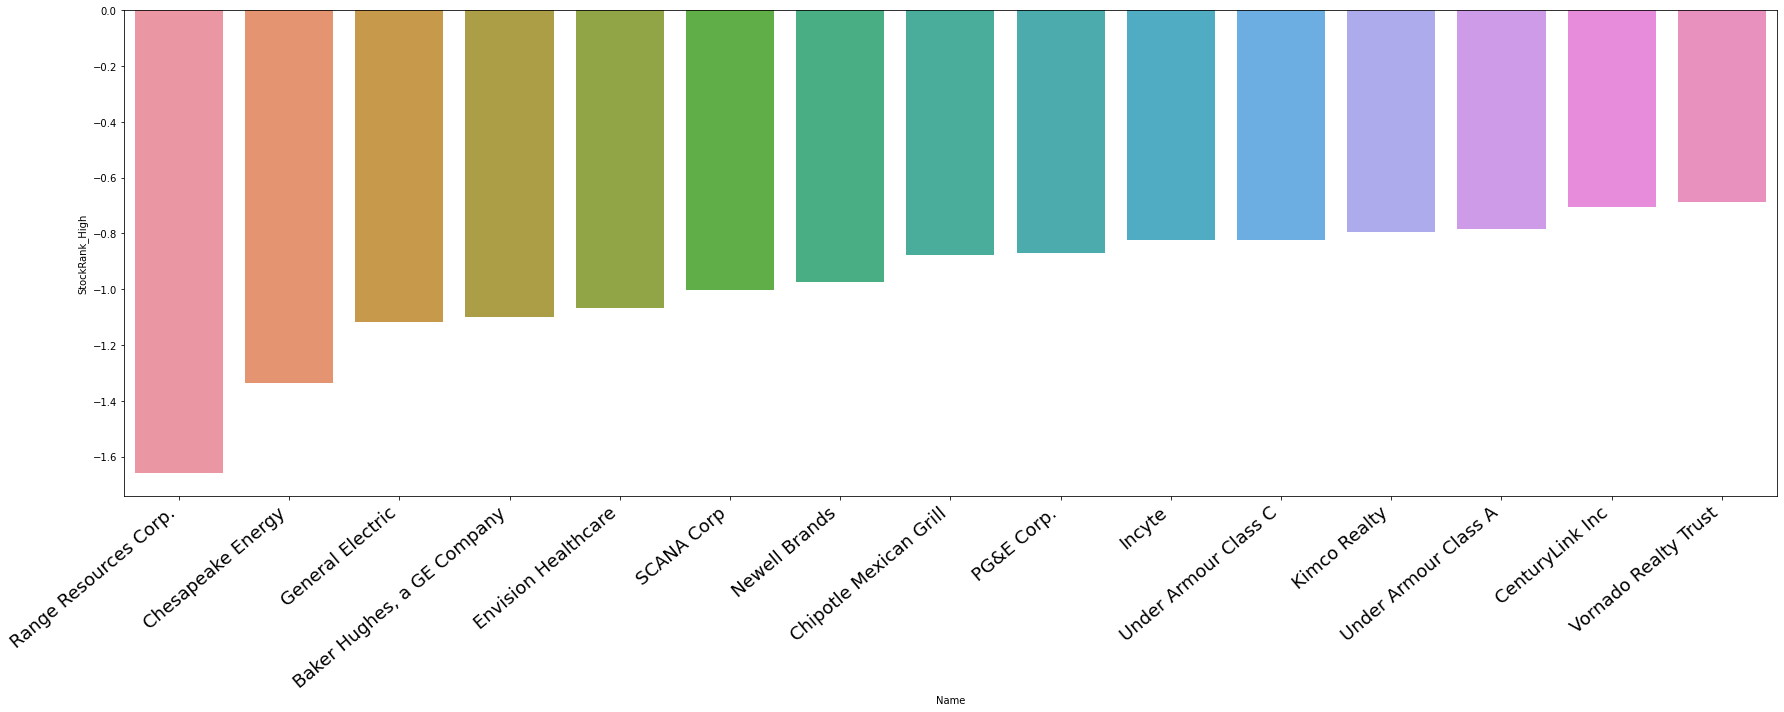

In [28]:
fig = plt.figure(figsize=(25,10))

fig = drops_plot = sns.barplot( x = 'Name', y = 'StockRank_High' , data = drops)

fig.set_xticklabels(fig.get_xticklabels(), rotation=40, ha="right",fontsize=18)

plt.tight_layout()

plt.show()


**This graph shows compaies hit by biggest drops in MV. As we have observed above Energy sector was negatively affected. And first 4 companies showing significant price drops(Range Resources, Cheepsake, and two GE Companies) all represent Energy sector. Then we see some drops in Healthcare and Utilities.**

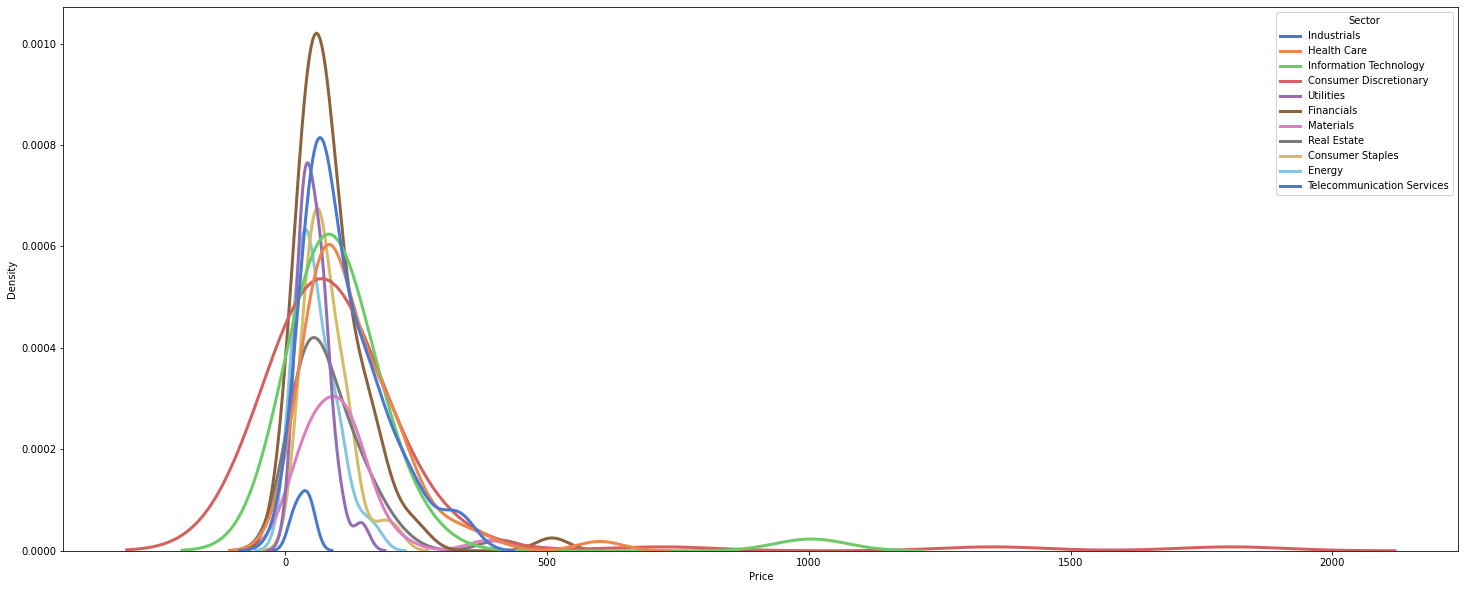

In [29]:
#Stock Ranking Ditribution by Sector

fig = plt.figure(figsize=(25,10))

StockRank_High = sns.kdeplot(
   data=df, x="Price", hue='Sector',
   fill=False, common_norm=True, palette="muted",
   alpha=.5, linewidth=3,
)

### What Did We Learn From This Data?

**From the various graphs that were created to visualize we were able to identify a few trends within the data:**

- Industrials, Materials, Consumer Discretionary, and Financial sectors are among the most heavily represented areas of S&P 500

- Energy Sector has higest price spread

- There some big earners in consumers, but overal industry mean is closer to overal industries average EPS distribution is much wider in Finance but the mean is in the higher range of 4.43 and data is positevely skewed EPS of Energy sector's EPS is negatively skewed with EPS mean of -1.6

- According to the data the biggest earners are Salesforce, GE, Amazon, Vertex, EOG and Neflix

- In general PE, and EPS follow the same fluctuation pattern with the Price

- The biggest drop over 52 week period was in Energy (the biggest drop experiensed by GE companies), and Healthcare (Envision Healthcare dropped by -1.065)

- The biggest price increase over 52 week period was in HealthCare (Align Technology 60% price increase, AbbVie, Vertex Pharma) followed by IT (Nvidia, PayPal, Netflix, Micron, and Amazon) and big industrials like Boeing and Grainger

- Among companies with biggest growth over the 52w period are Amazon, Priceline, Google, AutoZone, Mettler, Boeing, Netflix, and Chipotle

- Amazon's stock almost doubled growing almost 50% of its MV, Vertex, Cintras, SBA and Salesforce has also shown significant growth rate

- There are dependancies between stock price and PE, EPS, Market Cap, and Growth

- The stogest correlation of 0.93 is between Price and Growth EPS, Market Cap, and PE are among other factors affecting price

- The most expensive stock is held by Healthcare, Consumer Disretionary, IT, and Industrials

- Market Price ditribution suggets that Price data is skewed to the right, with a long righ tail at 1,806 dollars in max value and 3 dollars per share the cheapest stock. A center at 74 dollars per share, and average of 104

- As we have observed above Energy sector was negatively affected. And first 4 companies showing significant price drops(Range Resources, Cheepsake, and two GE Companies) all represent Energy sector. Then we see some drops in Healthcare and Utilities.

